In [5]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
import pickle


print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('matplotlib : {}'.format(matplotlib.__version__))
print('Seaborn : {}'.format(seaborn.__version__))
print('Scipy : {}'.format(scipy.__version__))
print('Sklearn : {}'.format(sklearn.__version__))



Python : 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy : 1.14.3
Pandas : 0.23.0
matplotlib : 2.2.2
Seaborn : 0.8.1
Scipy : 1.1.0
Sklearn : 0.19.1


In [6]:
#import the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score

In [7]:
#load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [8]:
#explore the dataset 
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
print(data.shape)

(284807, 31)


In [10]:
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
data = data.sample(frac = 0.5, random_state = 1)
print(data.shape)


(142404, 31)


In [12]:
#to get the histogram diagram for all the columns 
#determine no. of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
Outlier_fraction = len(Fraud)/float(len(Valid))

print(Outlier_fraction)
print('Fraud Cases : {}' .format(len(Fraud)))   
print('Valid Cases : {}'.format(len(Valid)))


0.0015966014193575613
Fraud Cases : 227
Valid Cases : 142177


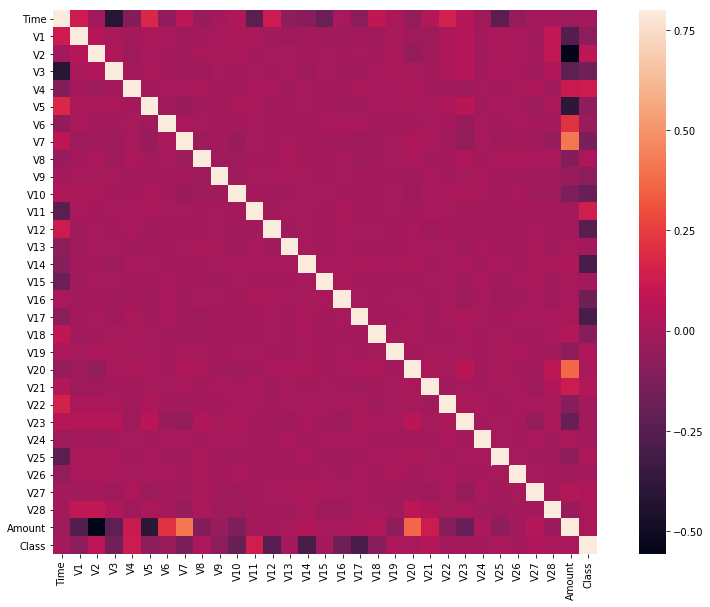

In [30]:
#creating the correlational matrix 

corrmat = data.corr()
fig = plt.figure(figsize = (15,10))

sns.heatmap(corrmat , vmax = .8 , square = True)
plt.show()



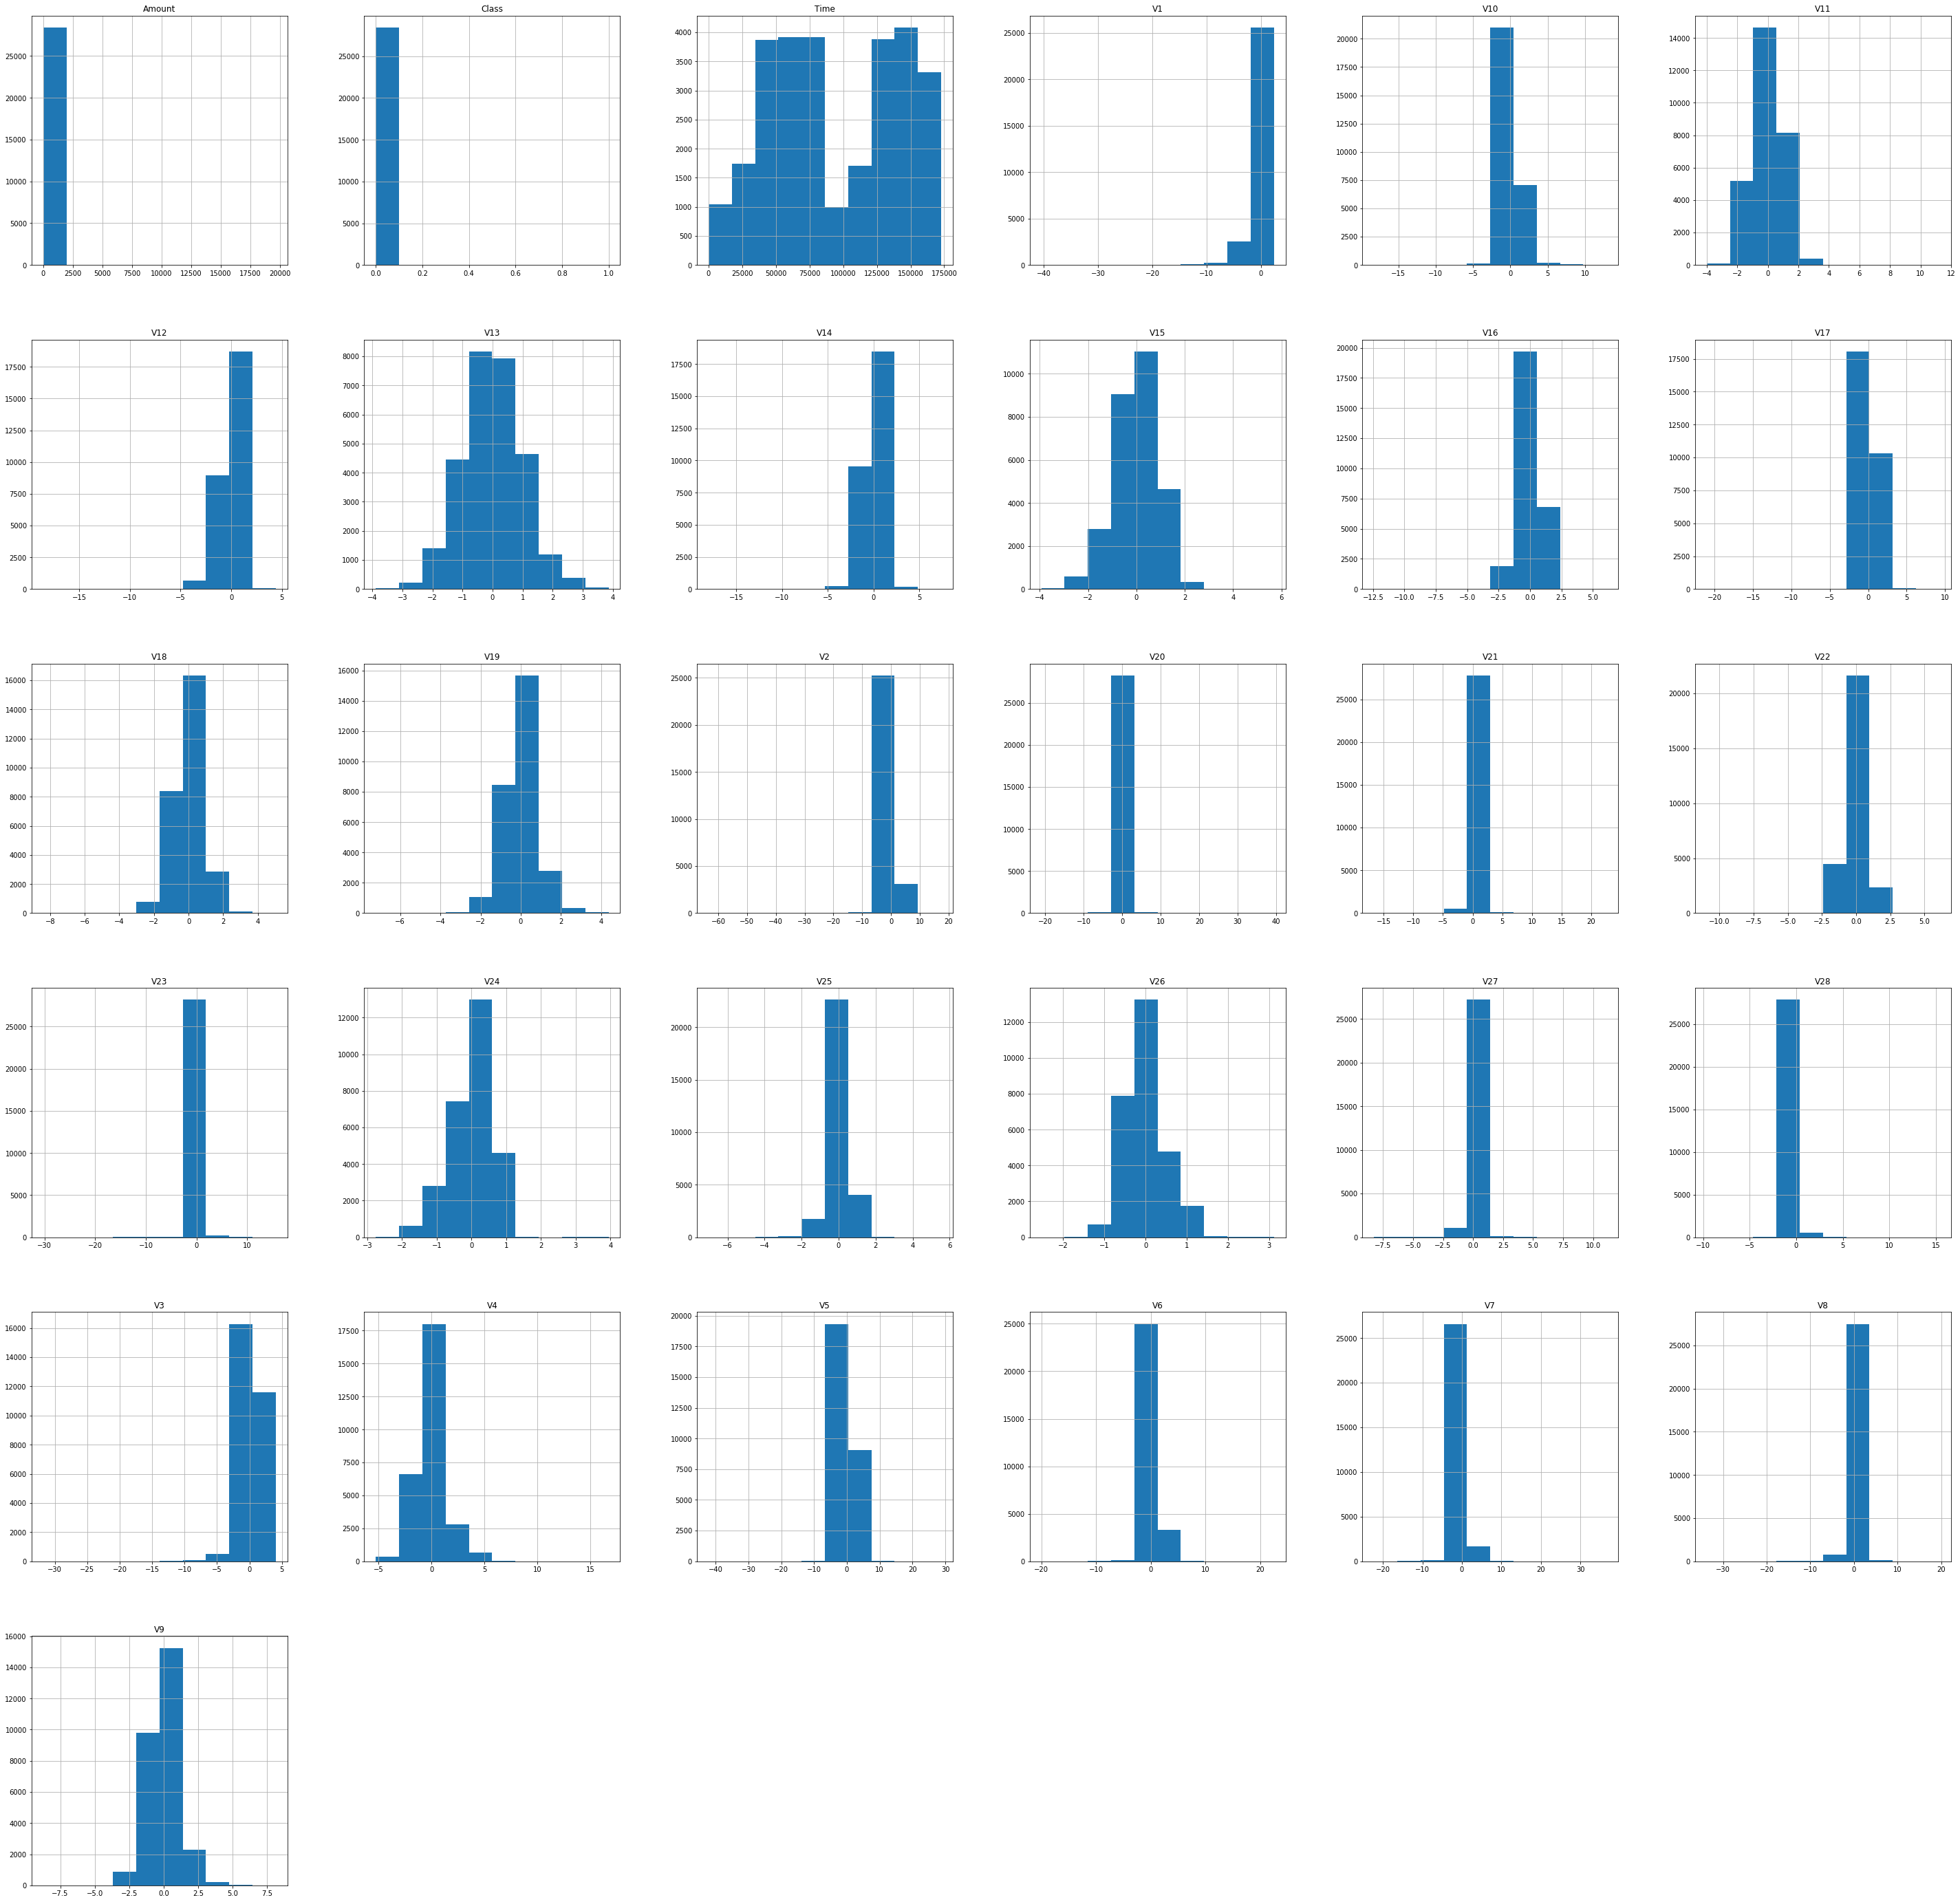

In [31]:
#plot hisograms for each parameter

data.hist(figsize = (50,50))
plt.show()

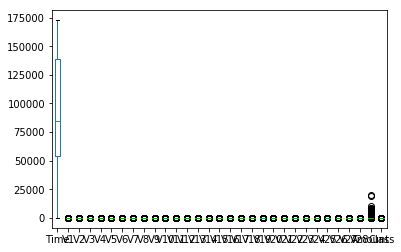

In [16]:
data.plot.box()
plt.show()

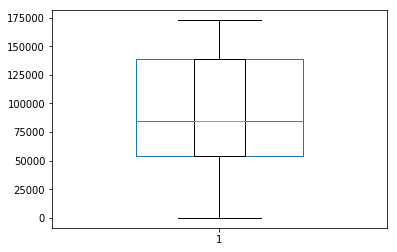

In [17]:
data.plot.box()
plt.boxplot(data['Time'])
plt.show()

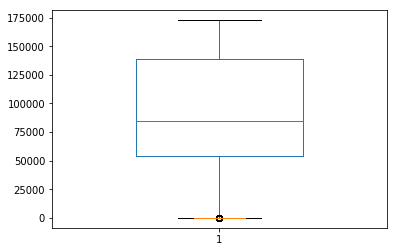

In [18]:
data.plot.box()
plt.boxplot(data['Class'])
plt.show()

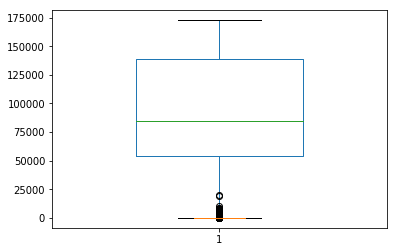

In [19]:
data.plot.box()
plt.boxplot(data['Amount'])
plt.show()

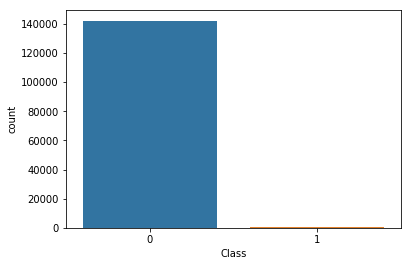

In [73]:
sns.countplot(data['Class'])

In [32]:
#now we need to format our data set slightly to get all columns from the dataframe

columns = data.columns.tolist()

#filter the columns to remove data hat is not required 

columns = [c for c in columns if c not in ['Class']]
print(columns)
print(data.shape)

#store the variables we'll be predicting on 

target ='Class'

X = data[columns]
Y = data[target]


#Print the shapes of X and Y

print(X.shape)
print(Y.shape)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(28481, 31)
(28481, 30)
(28481,)


In [33]:
from sklearn.metrics import classification_report

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state

state = 1

#define the outlier detection methods 

classifiers = { "Isolation Forest " : IsolationForest( max_samples = len(X) , 
                                                      contamination = Outlier_fraction, 
                                                      random_state = state),
    
    "Local Outlier Factor" : LocalOutlierFactor( 
        n_neighbors = 20, 
        contamination = Outlier_fraction)
}



In [41]:
# fit the model

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit te data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        print("LOF executed")
        scores_pred = clf.negative_outlier_factor_
        # Export the classifier to a file
        with open('model.pkl', 'wb') as model_file:
            pickle.dump(clf, model_file)
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
        
        print("IF executed")
        # Export the classifier to a file
        with open('model.pkl', 'wb') as model_file:
            pickle.dump(clf, model_file)
            
    # Reshape the prediction values to 0 for valid and 1 for fraudulent
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()


# run classification metrics 
print('{}: {}'.format(clf_name, n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))
            

IF executed
LOF executed
Local Outlier Factor: 97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481



In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')